In [1]:
#Data設定
import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

#解quadratic programming
import numpy
import cvxopt
from cvxopt import matrix, solvers

# The digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))#圖和數字標記
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
#分出training和test的sample

In [2]:
def svm(Image0,Image1,Image0_test,Image1_test,s):
    import numpy
    import cvxopt
    from cvxopt import matrix, solvers
    solvers.options['show_progress'] = False  
     
    T0=matrix(Image0.reshape(len(Image0),64).tolist())
    T1=matrix(Image1.reshape(len(Image1),64).tolist())

    y1=matrix(np.ones([1,len(Image0)]).tolist())
    y2=(-1)*matrix(np.ones([1,len(Image1)]).tolist())
    y=matrix([y1,y2])

    T=matrix([T0.T,T1.T])

    t0=matrix(Image0_test.reshape(len(Image0_test),64).tolist())
    t1=matrix(Image1_test.reshape(len(Image1_test),64).tolist())

    y1=matrix(np.ones([1,len(Image0_test)]).tolist())
    y2=(-1)*matrix(np.ones([1,len(Image1_test)]).tolist())
    yt=matrix([y1,y2])

    t=matrix([t0.T,t1.T])

    
    P1=[]
    for i in range(T.size[0]):
        for j in range(T.size[0]):
            P1.append(y[i]*y[j]*np.exp(-s*(np.linalg.norm(T[i,:]-T[j,:]))**2))      

    
    P2=np.array(P1).reshape(T.size[0],T.size[0])
    P=matrix(P2)
    
    q1=-1*np.ones(T.size[0])
    q2=q1.astype(float)
    q=matrix(q1.tolist())
    y1=np.array(y).astype(float)
    A=matrix(y1.tolist(),(1,T.size[0]))
    b = matrix([0.0])

    G1=-1*matrix(np.eye(T.size[0]).tolist())
    G2=matrix(np.eye(T.size[0]).tolist())
    G=matrix([G1,G2])

    c1=0
    h1=c1*np.ones(T.size[0])
    h2=h1.astype(float)
    h_1=matrix(h2.tolist())

    c2=5
    hh1=c2*np.ones(T.size[0])
    hh2=hh1.astype(float)
    h_2=matrix(hh2.tolist())
    h=matrix([h_1,h_2])
    results_digit = solvers.qp(P,q,G,h,A,b)
    
    p0=np.argwhere(np.array(results_digit['x'])>0.0001)[0][0]
    p1=p0.tolist()
    
    a=matrix(results_digit['x'])
    b=0
    for i in range(T.size[0]):
        b=b+a[i]*y[i]*np.exp(-s*(np.linalg.norm(T[i,:]-T[p1,:]))**2)      

    b=y[p1]-b
    
    
    F=[]
    for j in range(t.size[0]):
        f=0
        for i in range(T.size[0]):
            f=f+a[i]*y[i]*np.exp(-s*(np.linalg.norm(T[i,:]-t[j,:]))**2)     
        f=f+b
        F.append(f)
    #correct
   # f=0
    #for i in range(T.size[0]):
    #        f=f+a[i]*y[i]*np.exp(-s*(np.linalg.norm(T[i,:]-T[0,:]))**2)     
    #f=f+b
    zi=0 #1*f

    
    
    return a,b,T.size[0],T,y,zi,print(1-np.abs(np.array(np.where(np.sign(F)>0)).size-len(Image0_test))/len(Image0_test))

In [4]:
def svm_predict(m,n1,n2,X_test):
    f=0
    for i in range(m[2]):
        f=f+m[0][i]*m[4][i]*np.exp(-0.0001*(np.linalg.norm(m[3][i,:]-matrix(X_test.reshape(1,64))))**2)     
    f=f+m[1]
    
    if f>0:
        predict=n1
    else:
        predict=n2
    return predict

In [5]:
def Image_data(n):
    itemindexn = np.argwhere(y_train==n)
    imagen=X_train[itemindexn]
    itemindexn = np.argwhere(y_test==n)
    imagen_test=X_test[itemindexn]

    return [imagen,imagen_test]

In [6]:
[image0,image0_test]=Image_data(0)
[image1,image1_test]=Image_data(1)
[image2,image2_test]=Image_data(2)
[image3,image3_test]=Image_data(3)
[image4,image4_test]=Image_data(4)
[image5,image5_test]=Image_data(5)
[image6,image6_test]=Image_data(6)
[image7,image7_test]=Image_data(7)
[image8,image8_test]=Image_data(8)
[image9,image9_test]=Image_data(9)

In [7]:
m01=svm(image0,image1,image0_test,image1_test,0.001)
m02=svm(image0,image2,image0_test,image2_test,0.001)
m03=svm(image0,image3,image0_test,image3_test,0.001)
m04=svm(image0,image4,image0_test,image4_test,0.0005)
m05=svm(image0,image5,image0_test,image5_test,0.001)
m06=svm(image0,image6,image0_test,image6_test,0.001)
m07=svm(image0,image7,image0_test,image7_test,0.0001)
m08=svm(image0,image8,image0_test,image8_test,0.0001)
m09=svm(image0,image9,image0_test,image9_test,0.001)

1.0
1.0
1.0
0.9886363636363636
1.0
1.0
1.0
1.0
1.0


In [8]:
m12=svm(image1,image2,image1_test,image2_test,0.001)
m13=svm(image1,image3,image1_test,image3_test,0.001)
m14=svm(image1,image4,image1_test,image4_test,0.001)
m15=svm(image1,image5,image1_test,image5_test,0.0001)
m16=svm(image1,image6,image1_test,image6_test,0.0001) 
m17=svm(image1,image7,image1_test,image7_test,0.0001)
m18=svm(image1,image8,image1_test,image8_test,0.0001)
m19=svm(image1,image9,image1_test,image9_test,0.0001)

0.978021978021978
0.989010989010989
0.967032967032967
1.0
1.0
1.0
0.989010989010989
0.989010989010989


In [9]:
m23=svm(image2,image3,image2_test,image3_test,0.001)
m24=svm(image2,image4,image2_test,image4_test,0.001)
m25=svm(image2,image5,image2_test,image5_test,0.001)
m26=svm(image2,image6,image2_test,image6_test,0.001)
m27=svm(image2,image7,image2_test,image7_test,0.001)
m28=svm(image2,image8,image2_test,image8_test,0.001)
m29=svm(image2,image9,image2_test,image9_test,0.0001)

1.0
0.9883720930232558
1.0
1.0
1.0
1.0
1.0


In [10]:
m34=svm(image3,image4,image3_test,image4_test,0.001)
m35=svm(image3,image5,image3_test,image5_test,0.0001)
m36=svm(image3,image6,image3_test,image6_test,0.0001)
m37=svm(image3,image7,image3_test,image7_test,0.0001)
m38=svm(image3,image8,image3_test,image8_test,0.00005)
m39=svm(image3,image9,image3_test,image9_test,0.0001)

1.0
0.989010989010989
1.0
0.989010989010989
0.967032967032967
1.0


In [11]:
m45=svm(image4,image5,image4_test,image5_test,0.001)
m46=svm(image4,image6,image4_test,image6_test,0.001)
m47=svm(image4,image7,image4_test,image7_test,0.001)
m48=svm(image4,image8,image4_test,image8_test,0.0001)
m49=svm(image4,image9,image4_test,image9_test,0.00001)

0.9782608695652174
1.0
0.9782608695652174
0.967391304347826
0.9891304347826086


In [12]:
m56=svm(image5,image6,image5_test,image6_test,0.001)
m57=svm(image5,image7,image5_test,image7_test,0.001)
m58=svm(image5,image8,image5_test,image8_test,0.001)
m59=svm(image5,image9,image5_test,image9_test,0.001)

0.989010989010989
0.989010989010989
1.0
0.989010989010989


In [13]:
m67=svm(image6,image7,image6_test,image7_test,0.001)
m68=svm(image6,image8,image6_test,image8_test,0.001)
m69=svm(image6,image9,image6_test,image9_test,0.001)

m78=svm(image7,image8,image7_test,image8_test,0.001)
m79=svm(image7,image9,image7_test,image9_test,0.001)

m89=svm(image8,image9,image8_test,image9_test,0.001)

1.0
1.0
1.0
1.0
1.0
0.9886363636363636


In [14]:
parameter=[m01,m02,m03,m04,m05,m06,m07,m08,m09,m12,m13,m14,m15,m16,m17,m18,m19,m23,m24,m25,m26,m27,m28,m29,m34,m35,m36,m37,m38,m39,m45,m46,m47,m48,m49,m56,m57,m58,m59,m67,m68,m69,m78,m79,m89]

In [15]:
def svm_newdata(M,X_test):
    s01=svm_predict(M[0],0,1,X_test)
    s02=svm_predict(M[1],0,2,X_test)
    s03=svm_predict(M[2],0,3,X_test)
    s04=svm_predict(M[3],0,4,X_test)
    s05=svm_predict(M[4],0,5,X_test)
    s06=svm_predict(M[5],0,6,X_test)
    s07=svm_predict(M[6],0,7,X_test)
    s08=svm_predict(M[7],0,8,X_test)
    s09=svm_predict(M[8],0,9,X_test)

    s12=svm_predict(M[9],1,2,X_test)
    s13=svm_predict(M[10],1,3,X_test)
    s14=svm_predict(M[11],1,4,X_test)
    s15=svm_predict(M[12],1,5,X_test)
    s16=svm_predict(M[13],1,6,X_test)
    s17=svm_predict(M[14],1,7,X_test)
    s18=svm_predict(M[15],1,8,X_test)
    s19=svm_predict(M[16],1,9,X_test)

    s23=svm_predict(M[17],2,3,X_test)
    s24=svm_predict(M[18],2,4,X_test)
    s25=svm_predict(M[19],2,5,X_test)
    s26=svm_predict(M[20],2,6,X_test)
    s27=svm_predict(M[21],2,7,X_test)
    s28=svm_predict(M[22],2,8,X_test)
    s29=svm_predict(M[23],2,9,X_test)

    s34=svm_predict(M[24],3,4,X_test)
    s35=svm_predict(M[25],3,5,X_test)
    s36=svm_predict(M[26],3,6,X_test)
    s37=svm_predict(M[27],3,7,X_test)
    s38=svm_predict(M[28],3,8,X_test)
    s39=svm_predict(M[29],3,9,X_test)

    s45=svm_predict(M[30],4,5,X_test)
    s46=svm_predict(M[31],4,6,X_test)
    s47=svm_predict(M[32],4,7,X_test)
    s48=svm_predict(M[33],4,8,X_test)
    s49=svm_predict(M[34],4,9,X_test)

    s56=svm_predict(M[35],5,6,X_test)
    s57=svm_predict(M[36],5,7,X_test)
    s58=svm_predict(M[37],5,8,X_test)  
    s59=svm_predict(M[38],5,9,X_test)

    s67=svm_predict(M[39],6,7,X_test)
    s68=svm_predict(M[40],6,8,X_test)
    s69=svm_predict(M[41],6,9,X_test)

    s78=svm_predict(M[42],7,8,X_test)
    s79=svm_predict(M[43],7,9,X_test)

    s89=svm_predict(M[44],8,9,X_test)

    nums=[s01,s02,s03,s04,s05,s06,s07,s08,s09,s12,s13,s14,s15,s16,s17,s18,s19,s23,s24,s24,s25,s26,s27,s28,s29,s34,s35,s36,s37,s38,s39,s45,s46,s47,s48,s49,s56,s57,s58,s59,s67,s68,s69,s78,s79,s89]
    counts = np.bincount(nums)
    return np.argmax(counts)

5

<Figure size 432x288 with 0 Axes>

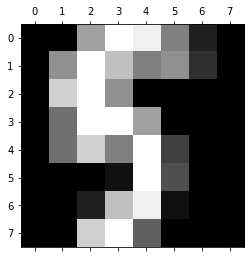

In [16]:
i0=np.random.randint(low=1,high=len(X_test),size=1)[0]
X_test[i0]
plt.gray()
plt.matshow(X_test[i0].reshape(8,8))
y_test[i0]

In [17]:
svm_newdata(parameter,X_test[i0])

5

In [18]:
score=0
for i in range(len(X_test)):
    if ((svm_newdata(parameter,X_test[i])-y_test[i])==0):
        score=score+1
score/len(X_test)

0.9010011123470523

In [17]:
#svm_predict(m,0,1,X_test[i0])



#f=0
#for i in range(m[2]):
#        f=f+m[0][i]*m[4][i]*np.exp(-0.0001*(np.linalg.norm(m[3][i,:]-matrix(image0[0].reshape(1,64))))**2)     
#f=f+m[1]

#1*f

In [259]:
#score/len(X_test)
len(X_test)

899

In [ ]:
#數字5,9的svm

In [173]:
#取出5,9的圖樣和標籤

itemindex0 = np.argwhere(y_train==1)
image0=X_train[itemindex0]
T0=matrix(image0.reshape(len(image0),64).tolist())

itemindex1 = np.argwhere(y_train==5)
image1=X_train[itemindex1]
T1=matrix(image1.reshape(len(image1),64).tolist())


y1=matrix(np.ones([1,len(image0)]).tolist())
y2=(-1)*matrix(np.ones([1,len(image1)]).tolist())

T01=matrix([T0.T,T1.T])
y01=matrix([y1,y2]) #數字0記 +1 ,數字1記 -1

#有二次項係數矩陣建造
s=0.001
P1=[]
for i in range(len(image0)+len(image1)):
    for j in range(len(image0)+len(image1)):
        P1.append(y01[i]*y01[j]*np.exp(-s*(np.linalg.norm(T01[i,:]-T01[j,:]))**2))      


P2=np.array(P1).reshape(len(image0)+len(image1),len(image0)+len(image1))
P=matrix(P2)
#print(P)

#二次規劃參數設定
q1=-1*np.ones(len(image0)+len(image1))
q2=q1.astype(float)

q=matrix(q1.tolist())

y1=np.array(y01).astype(float)

A=matrix(y1.tolist(),(1,len(image0)+len(image1)))

b = matrix([0.0])

G1=-1*matrix(np.eye(len(image0)+len(image1)).tolist())
G2=matrix(np.eye(len(image0)+len(image1)).tolist())
G=matrix([G1,G2])

c1=0
h1=c1*np.ones(len(image0)+len(image1))
h2=h1.astype(float)
h_1=matrix(h2.tolist())

c2=10
hh1=c2*np.ones(len(image0)+len(image1))
hh2=hh1.astype(float)

h_2=matrix(hh2.tolist())

h=matrix([h_1,h_2])


#解二次規劃
results_digit = solvers.qp(P,q,G,h,A,b)
#print(results_digit['x'])

p1=np.argwhere(np.array(results_digit['x'])>0.0001)[0][0]


In [175]:
p1
len(image0)+len(image1)

182

In [149]:
a01=matrix(results_digit['x'])

#求截距
b01=0
for i in range(len(image0)+len(image1)):
    b01=b01+a01[i]*y01[i]*np.exp(-s*(np.linalg.norm(T01[i,:]-T01[6,:]))**2)      

b01=y01[6]-b01
print(b01)

0.02474721160891502


In [150]:
#帶入Test data檢查正確率

itemindex0 = np.argwhere(y_test==1)
image0_test=X_test[itemindex0]
t0=matrix(image0_test.reshape(len(image0_test),64).tolist())


itemindex1 = np.argwhere(y_test==5)
image1_test=X_test[itemindex1]
t1=matrix(image1_test.reshape(len(image1_test),64).tolist())

y1=matrix(np.ones([1,len(image0_test)]).tolist())
y2=(-1)*matrix(np.ones([1,len(image1_test)]).tolist())

yt01=matrix([y1,y2])
t01=matrix([t0.T,t1.T])


F=[]
for j in range(len(image0_test)+len(image1_test)):
    f=0
    for i in range(len(image0)+len(image1)):
        f=f+a01[i]*y01[i]*np.exp(-s*(np.linalg.norm(T01[i,:]-t01[j,:]))**2)     
    f=f+b01
    F.append(f)

In [151]:
#correct
1-np.abs(np.array(np.where(np.sign(F)>0)).size-len(image0_test))/len(image0_test)

0.989010989010989

In [ ]:
#數字2,0的svm

In [326]:
#取出0,2的圖樣和標籤

itemindex0 = np.argwhere(y_train==0)
image0=X_train[itemindex0]
T0=matrix(image0.reshape(len(image0),64).tolist())

itemindex2 = np.argwhere(y_train==2)
image2=X_train[itemindex2]
T2=matrix(image2.reshape(len(image2),64).tolist())


y1=matrix(np.ones([1,len(image0)]).tolist())
y2=(-1)*matrix(np.ones([1,len(image2)]).tolist())

T20=matrix([T2.T,T0.T])
y20=matrix([y1,y2]) #數字0記 +1 ,數字1記 -1

#有二次項係數矩陣建造
s=0.0001
P1=[]
for i in range(len(image0)+len(image2)):
    for j in range(len(image0)+len(image2)):
        P1.append(y20[i]*y20[j]*np.exp(-s*(np.linalg.norm(T20[i,:]-T20[j,:]))**2))      


P2=np.array(P1).reshape(len(image0)+len(image2),len(image0)+len(image2))
P=matrix(P2)
#print(P)

#二次規劃參數設定
q1=-1*np.ones(len(image0)+len(image2))
q2=q1.astype(float)

q=matrix(q1.tolist())

y1=np.array(y02).astype(float)

A=matrix(y1.tolist(),(1,len(image0)+len(image2)))

b = matrix([0.0])

G1=-1*matrix(np.eye(len(image0)+len(image2)).tolist())
G2=matrix(np.eye(len(image0)+len(image2)).tolist())
G=matrix([G1,G2])

c1=0
h1=c1*np.ones(len(image0)+len(image2))
h2=h1.astype(float)
h_1=matrix(h2.tolist())

c2=10
hh1=c2*np.ones(len(image0)+len(image2))
hh2=hh1.astype(float)

h_2=matrix(hh2.tolist())

h=matrix([h_1,h_2])


#解二次規劃
results_digit = solvers.qp(P,q,G,h,A,b)
#print(results_digit['x'])

     pcost       dcost       gap    pres   dres
 0:  4.7227e+02 -6.2150e+03  1e+04  3e-01  2e-14
 1:  2.9109e+02 -7.1539e+02  1e+03  6e-03  2e-14
 2:  8.7729e+00 -1.1877e+02  1e+02  2e-14  1e-14
 3: -2.3018e+01 -4.9129e+01  3e+01  1e-14  6e-15
 4: -2.9331e+01 -3.8620e+01  9e+00  3e-15  6e-15
 5: -3.3096e+01 -3.7167e+01  4e+00  2e-15  6e-15
 6: -3.3874e+01 -3.4655e+01  8e-01  7e-15  5e-15
 7: -3.4139e+01 -3.4226e+01  9e-02  5e-15  5e-15
 8: -3.4173e+01 -3.4176e+01  2e-03  2e-14  6e-15
 9: -3.4174e+01 -3.4174e+01  3e-05  1e-14  6e-15
Optimal solution found.


In [327]:
p1=np.argwhere(np.array(results_digit['x'])>0.0001)[1][0]
p1

45

In [328]:
a20=matrix(results_digit['x'])

#求截距
b20=0
for i in range(len(image0)+len(image2)):
    b20=b20+a20[i]*y20[i]*np.exp(-s*(np.linalg.norm(T20[i,:]-T20[45,:]))**2)      

b20=y[45]-b20
print(b20)

0.6280082685935133


In [329]:
#帶入Test data檢查正確率

itemindex0 = np.argwhere(y_test==0)
image0_test=X_test[itemindex0]
t0=matrix(image0_test.reshape(len(image0_test),64).tolist())


itemindex2 = np.argwhere(y_test==2)
image2_test=X_test[itemindex2]
t2=matrix(image2_test.reshape(len(image2_test),64).tolist())

y1=matrix(np.ones([1,len(image0_test)]).tolist())
y2=(-1)*matrix(np.ones([1,len(image2_test)]).tolist())

yt20=matrix([y1,y2])
t20=matrix([t2.T,t0.T])


F=[]
for j in range(len(image0_test)+len(image2_test)):
    f=0
    for i in range(len(image0)+len(image2)):
        f=f+a20[i]*y20[i]*np.exp(-s*(np.linalg.norm(T20[i,:]-t20[j,:]))**2)     
    f=f+b20
    F.append(f)

In [330]:
#correct
1-np.abs(np.array(np.where(np.sign(F)>0)).size-len(image2_test))/len(image2_test)

1.0

In [ ]:
#數字1,2的svm

In [249]:
#取出1,2的圖樣和標籤

itemindex1 = np.argwhere(y_train==1)
image1=X_train[itemindex1]
T1=matrix(image1.reshape(len(image1),64).tolist())

itemindex2 = np.argwhere(y_train==2)
image2=X_train[itemindex2]
T2=matrix(image2.reshape(len(image2),64).tolist())


y1=matrix(np.ones([1,len(image1)]).tolist())
y2=(-1)*matrix(np.ones([1,len(image2)]).tolist())

T12=matrix([T1.T,T2.T])
y12=matrix([y1,y2]) #數字0記 +1 ,數字1記 -1

#有二次項係數矩陣建造
s=0.0001
P1=[]
for i in range(len(image1)+len(image2)):
    for j in range(len(image1)+len(image2)):
        P1.append(y12[i]*y12[j]*np.exp(-s*(np.linalg.norm(T12[i,:]-T12[j,:]))**2))      


P2=np.array(P1).reshape(len(image1)+len(image2),len(image1)+len(image2))
P=matrix(P2)
#print(P)

#二次規劃參數設定
q1=-1*np.ones(len(image1)+len(image2))
q2=q1.astype(float)

q=matrix(q1.tolist())

y1=np.array(y12).astype(float)

A=matrix(y1.tolist(),(1,len(image1)+len(image2)))

b = matrix([0.0])

G1=-1*matrix(np.eye(len(image1)+len(image2)).tolist())
G2=matrix(np.eye(len(image1)+len(image2)).tolist())
G=matrix([G1,G2])

c1=0
h1=c1*np.ones(len(image1)+len(image2))
h2=h1.astype(float)
h_1=matrix(h2.tolist())

c2=10
hh1=c2*np.ones(len(image1)+len(image2))
hh2=hh1.astype(float)

h_2=matrix(hh2.tolist())

h=matrix([h_1,h_2])


#解二次規劃
results_digit = solvers.qp(P,q,G,h,A,b)
#print(results_digit['x'])

     pcost       dcost       gap    pres   dres
 0:  5.7422e+02 -7.2978e+03  1e+04  2e-01  3e-14
 1:  2.8640e+02 -8.4801e+02  1e+03  1e-02  4e-14
 2:  7.2420e+00 -1.9972e+02  2e+02  8e-04  3e-14
 3: -3.9342e+01 -1.2223e+02  8e+01  2e-04  2e-14
 4: -5.7964e+01 -9.3840e+01  4e+01  4e-05  2e-14
 5: -6.8389e+01 -7.8763e+01  1e+01  6e-07  2e-14
 6: -7.1278e+01 -7.3463e+01  2e+00  1e-07  2e-14
 7: -7.2019e+01 -7.2201e+01  2e-01  2e-09  2e-14
 8: -7.2097e+01 -7.2100e+01  3e-03  2e-11  2e-14
 9: -7.2098e+01 -7.2098e+01  4e-05  2e-13  2e-14
Optimal solution found.


In [250]:
p1=np.argwhere(np.array(results_digit['x'])>0.0001)[0][0]
p1

21

In [255]:
a12=matrix(results_digit['x'])

#求截距
b12=0
for i in range(len(image1)+len(image2)):
    b12=b12+a12[i]*y12[i]*np.exp(-s*(np.linalg.norm(T12[i,:]-T12[21,:]))**2)      

b12=y[21]-b12
print(b12)

0.3909693849578708


In [259]:
#帶入Test data檢查正確率

itemindex1 = np.argwhere(y_test==1)
image1_test=X_test[itemindex1]
t1=matrix(image1_test.reshape(len(image1_test),64).tolist())


itemindex2 = np.argwhere(y_test==2)
image2_test=X_test[itemindex2]
t2=matrix(image2_test.reshape(len(image2_test),64).tolist())

y1=matrix(np.ones([1,len(image1_test)]).tolist())
y2=(-1)*matrix(np.ones([1,len(image2_test)]).tolist())

yt12=matrix([y1,y2])
t12=matrix([t1.T,t2.T])


F=[]
for j in range(len(image1_test)+len(image2_test)):
    f=0
    for i in range(len(image1)+len(image2)):
        f=f+a12[i]*y12[i]*np.exp(-s*(np.linalg.norm(T12[i,:]-t12[j,:]))**2)     
    f=f+b12
    F.append(f)

In [260]:
#correct
1-np.abs(np.array(np.where(np.sign(F)>0)).size-len(image1_test))/len(image1_test)

0.978021978021978

0

<Figure size 432x288 with 0 Axes>

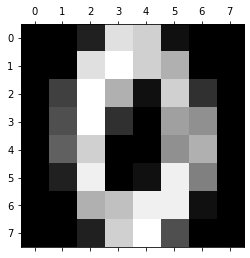

In [353]:
i0=np.random.randint(low=1,high=len(X_test),size=1)[0]
X_test[i0]
plt.gray()
plt.matshow(X_test[i0].reshape(8,8))
y_test[i0]

In [354]:
#數字1,2 svm
f12=0
for i in range(len(image1)+len(image2)):
    f12=f12+a12[i]*y12[i]*np.exp(-s*(np.linalg.norm(T12[i,:]-matrix(X_test[i0].reshape(1,64))))**2)     
f12=f12+b12
f12

-0.5619809339814478

In [355]:
#數字 2,0svm
f20=0
for i in range(len(image0)+len(image2)):
    f20=f20+a20[i]*y20[i]*np.exp(-s*(np.linalg.norm(T20[i,:]-matrix(X_test[i0].reshape(1,64))))**2)     
f20=f20+b20
f20

-1.5710634317157115

In [356]:
#數字0,1 svm
f01=0
for i in range(len(image0)+len(image1)):
    f01=f01+a01[i]*y01[i]*np.exp(-s*(np.linalg.norm(T01[i,:]-matrix(X_test[i0].reshape(1,64))))**2)     
f01=f01+b01
f01

1.549203967035815

In [357]:
Score=[f01,f20,f12]
np.where(Score==max(Score))[0][0]

0